# Assignment 1

Make sure you run your code before saving and submitting so that the output can be easily checked.

## Problems

### Week 1

>**Ex 1.1.12**: Take another list `b = list("ofcourseistillloveyou")` and
1. get the `set` of characters that exist in both `a` and `b` (intersection),
2. get the `set` of characters that exist in either `a` or `b` (union), and
3. compute the [Jaccard similarity](https://en.wikipedia.org/wiki/Jaccard_index) between the distinct elements in `a` and `b`.
>
>*Hint: use the `set` function to get a `set`-type object of distinct elements from a list. Sets supports a [number of different operations](https://snakify.org/en/lessons/sets/#section_4).*

In [6]:
#Answer to 1.1.12
a = list("justreadtheinstructions")
b = list("ofcourseistillloveyou")
#1 Get the set of characters that exist in both a and b
inter = list(set(a) & set(b))
print("Intersection of a & b: " + str(inter))
#2 Get the set of characters that exist in a or b
union = list(set(a) or set(b))
print("Union of a & b: " + str(union))
#3 Compute the Jaccard similarity between the distinct elements in a and b
print("Jaccard similarity of a & b: " + str(len(inter) / len(union)))

Intersection of a & b: ['t', 'c', 's', 'r', 'o', 'i', 'u', 'e']
Union of a & b: ['t', 'c', 'i', 'a', 's', 'e', 'd', 'h', 'n', 'o', 'r', 'u', 'j']
Jaccard similarity of a & b: 0.6153846153846154


>**Ex. 1.2.4**: The URL reveals that the data is from reddit/r/gameofthrones, but can you recover that information from the data? Give your answer by 'keying' into the dictionary using square brackets.
>
>*Hint: 'Keying' is a word i just made up. By it, I mean the following. Consider a nested dictionary like:*
>
>        my_json_obj = {
>            'cats': {
>                'awesome': ['Missy'],
>                'useless': ['Kim', 'Frank', 'Sandy']
>            },
>            'dogs': {
>                'awesome': ['Finn', 'Dolores', 'Fido', 'Casper'],
>                'useless': []
>            }
>        }
>
>*I can get the list of useless cats by keying into `my_json_obj` like such:*
>
>        >>> my_json_obj['cats']['useless']
>        Out [ ]: ['Kim', 'Frank', 'Sandy']
>
>*`my_json_obj['cats']` returns the dictionary `{'awesome': ['Missy'], 'useless': ['Kim', 'Frank', 'Sandy']}` and getting '`useless`' from that eventually gives us `['Kim', 'Frank', 'Sandy']`. If any of those list items were a list of a dictionary themselves, we could have kept keying deeper into the structure.*

In [8]:
#Answer 1.2.4 -- make sure the code here has everything it needs to run by itself (import statements, etc)
import requests
headers = {'User-agent': 'test'}
data = requests.get('https://www.reddit.com/r/gameofthrones/.json', headers = headers)
data = data.json()
type(data)
data['data']['children'][0]["data"]['subreddit']

'gameofthrones'

>**Ex 1.2.5**: Write two `for` loops (or list comprehensions for extra street credits) which:
>1. Counts the number of spoilers.
>2. Only prints headlines that aren't spoilers.

In [11]:
#Answer 1.2.5
#1
spoiler_count = 0
for post in data['data']['children']:
    if post['data']['spoiler']:
        spoiler_count+=1
print("Number of spoilers:", spoiler_count)

#2
for post in data['data']['children']:
    if not post['data']['spoiler']:
        print(post['data']['title'])

Number of spoilers: 4
Team "I don't want it"
Ai writes new game of thrones ending since the one we got sucked
Did a quick sketch of how Tyrion is supposed to look like in the books
[NO SPOILERS] Currently rewatching, so I had to paint my favourite character.
I found the best wallpaper
What is your favorite Castle in GOT?
[No Spoilers] An Anime of Ice and Fire - Jaime &amp;amp; Cersei Lannister
Robb and Daemon
An interesting similarity found
What was Little Finger’s ultimate goal?
Watching Season 7 Ep 7 - Bronn gets all the best lines
16 year olds in Westeros
What is your favorite throne from the show?
Favorite House Words and Sigil?
Who do you think was a better king - Robert Baratheon or Viserys Targaryen?
Lady Mormont had the biggest balls in a hall filled with leaders of minor houses and Jon Snow
season 4 could have been the last and I would have been fine with it.
Do You Think Grey Worm Could Be the Antagonist of the Jon Snow Series?
in storm's end when Borros Baratheon asked Lucer

### Week 2

>**Ex. 2.1.2**: The `get_x_y` function below gives you the number of comments versus score for the latest `N` posts on a given `subreddit`. First, make sure you understand the code.  Then: 
1. Make a scatter plot of `x` vs. `y` for the "blackmirror" subreddit (**remember** what you learned in the previous exercise about **styling**). **Comment on what you see in the plot.**
2. Maybe you've noticed that it looks pretty bad right, in the sense that lots of points are close to each other while a few are far away from the rest? That's because the data does *not scale linearly*! This is a very common thing. To visualize it you should then try to *transform* it somehow. In this case, the data scales *exponentially* in both the x and y direction. Which transformation should we use to make it look linear?
3. In two separate figures, floating side by side, scatter plot (left) the set of x and y variables for "blackmirror" and (right) x and y for "news" (you can use [subplots](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html), for example, to plot two figures sideby side). Remember to transform the data. When I solved this exercise a while back, my figure looked like [this](https://canvas.disabroad.org/courses/7869/files/1211244?module_item_id=224615).
4. Interpret and comment on any differences you see between the two plots. Why might number of comments versus post upvotes look different for a TV-show than for world news?
>
>*Hint: By "transformation" in point 2 and 3 above, I mean that you map some function onto every value in a list of values. Example: I can apply a square root transformation like `x = [np.sqrt(v) for v in x]`. A faster way to do that, of course, would be just `x = np.sqrt(x)`.*

In [41]:
import requests as rq

def get_x_y(subreddit, N, count=25):
    
    def _get_data(subreddit, count, after):
        url = f"https://www.reddit.com/r/{subreddit}/.json?count={count}&after={after}"
        data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json()
        print(f"Retrieved {count} posts from page {after}")
        return data
    
    after = ""

    x, y = [], []
    for n in range(N//count):
        data = _get_data(subreddit, count, after)
        for d in data['data']['children']:
            x.append(d['data']['num_comments'])
            y.append(d['data']['score'])
        after = data['data']['after']

    return x, y
                          
x, y = get_x_y("blackmirror", 500, count=25)

Retrieved 25 posts from page 
Retrieved 25 posts from page t3_10xcvo4
Retrieved 25 posts from page t3_10nbej9
Retrieved 25 posts from page t3_10fna0p
Retrieved 25 posts from page t3_101m2ew
Retrieved 25 posts from page t3_zvrf2w
Retrieved 25 posts from page t3_zrz5yf
Retrieved 25 posts from page t3_zl0dyl
Retrieved 25 posts from page t3_zdafp7
Retrieved 25 posts from page t3_z6tqyz
Retrieved 25 posts from page t3_yzop5g
Retrieved 25 posts from page t3_yqy9cp
Retrieved 25 posts from page t3_yhobj0
Retrieved 25 posts from page t3_yafn4v
Retrieved 25 posts from page t3_y4n0d1
Retrieved 25 posts from page t3_xyqmp7
Retrieved 25 posts from page t3_xqziz3
Retrieved 25 posts from page t3_xkhygs
Retrieved 25 posts from page t3_x9zzcz
Retrieved 25 posts from page t3_wyznkk


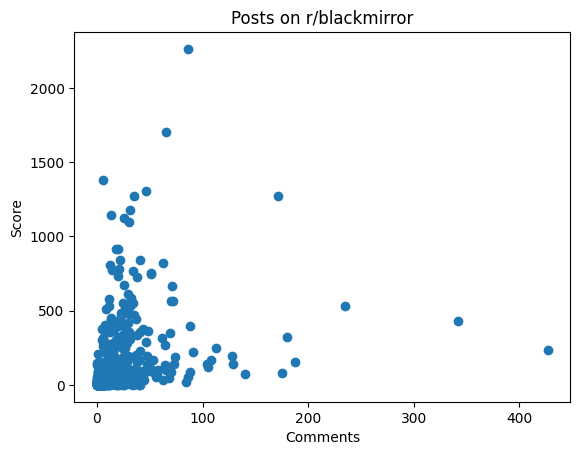

In [46]:
# Answer 1
plt.scatter(x, y)
plt.title("Posts on r/blackmirror")
plt.xlabel("Comments")
plt.ylabel("Score")
plt.show()

*Comments on graph* <br>
I notice that the posts with the highest score tend to have fewer comments. 
Also, the posts with the most comments tend to have scores that are quite low. 
For the most part, however, posts are clustered around the origin and it is hard to discern any pattern. 
To make our plot easier to read, we should use a logarithmic scale on our axes (take the log of the x and y values for each point). 

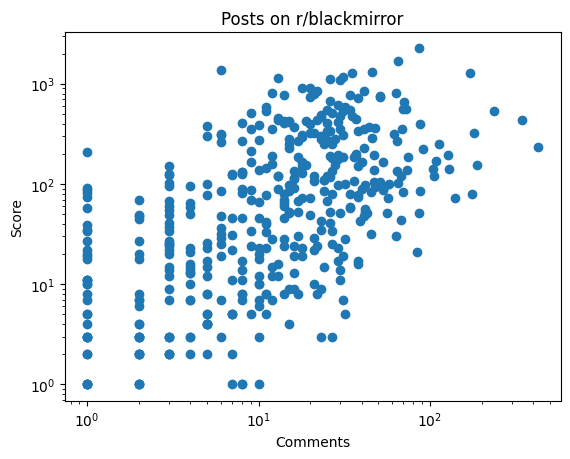

In [47]:
# Answer to 2
plt.scatter(x, y)
plt.title("Posts on r/blackmirror")
plt.xlabel("Comments")
plt.ylabel("Score")
plt.yscale('log')
plt.xscale('log')
plt.show()

In [48]:
# get r/news data
x2, y2 = get_x_y("news", 500, count=25)

Retrieved 25 posts from page 
Retrieved 25 posts from page t3_11407k2
Retrieved 25 posts from page t3_114ihfh
Retrieved 25 posts from page t3_113ckbq
Retrieved 25 posts from page t3_1137f45
Retrieved 25 posts from page t3_112xz09
Retrieved 25 posts from page t3_112nwx3
Retrieved 25 posts from page t3_111xq3g
Retrieved 25 posts from page t3_111i74h
Retrieved 25 posts from page t3_110hjlh
Retrieved 25 posts from page t3_10zmcuw
Retrieved 25 posts from page None
Retrieved 25 posts from page t3_11407k2
Retrieved 25 posts from page t3_114ihfh
Retrieved 25 posts from page t3_113ckbq
Retrieved 25 posts from page t3_1137f45
Retrieved 25 posts from page t3_112xz09
Retrieved 25 posts from page t3_112nwx3
Retrieved 25 posts from page t3_111xq3g
Retrieved 25 posts from page t3_111i74h


[Text(0.5, 1.0, 'r/news'),
 Text(0.5, 0, 'comments'),
 Text(0, 0.5, 'score'),
 None,
 None]

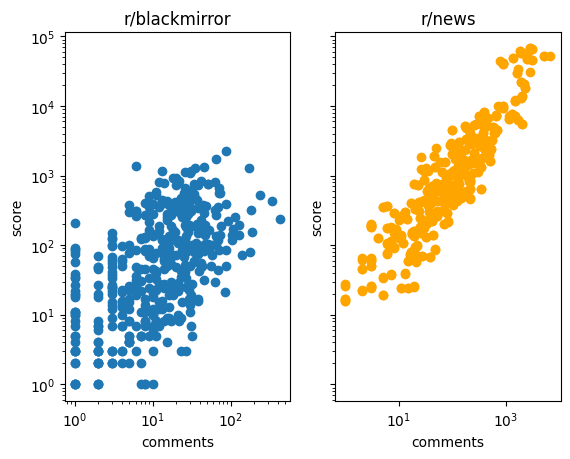

In [49]:
# Answer to 3
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x, y)
ax2.scatter(x2, y2, color='orange')
ax1.set(title='r/blackmirror', xlabel='comments', ylabel='score', yscale='log', xscale='log')
ax2.set(title='r/news',xlabel='comments', ylabel='score', yscale='log', xscale='log')

*Comments on r/blackmirror vs r/news* <br>
posts on r/news has a much higher baseline number of comments than r/blackmirror which is likely because r/news is one of the largest subreddits and has far more users and engagement on each post. Furthermore, posts on r/news are more likely to go viral because of their content as opposed to posts on r/blackmirror which will also contribute to the larger number of comments.

>**Ex. 2.2.5**: There's another use of the covariance matrix, other than just learning how features co-vary. In fact, it turns out that the *eigenvectors* of the covariance matrix are a set of mutually orthogonal vectors, that point in the directions of greatest variance in the data. The eigenvector with the greatest *eigenvalue* points along the direction of greatest variation, and so on. This is pretty neat, because if we know along which axes the data is most stretched, we can figure out how best to project it when visualizing it in 2D as a scatter plot! This whole procedure has a name: **Principal Component Analysis** (PCA) and it was invented by Karl Pearson in 1901. It belongs to a powerful class of linear algebra methods called **Matrix Factorization** methods. Ok, so rather than spending too much time on the math of PCA, let's just use the `sklearn` implementation and fit a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on `X`.

In [54]:
from sklearn.decomposition import PCA
import pandas as pd

# Download dataset
X = pd.read_csv("https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv").drop('Wine', axis=1)

pca = PCA(n_components=10)
pca.fit(X)

PCA(n_components=10)

>1. Explain what the matrix you get when you call `pca.components_` means.  Read about the `components_` attribute (run `?pca` in a code cell and then look under "Attributes").
2. Make a bar plot of `pca.explained_variance_ratio_` and explain what it means (you may want to log-scale the y-axis). What insights about our data can we extract from this?
3. Indeed, problem with the data AS-IS, is that the different features have very different variances (some are huge numbers others are small). The way to fix this is by doing something called "[zscoring](https://en.wikipedia.org/wiki/Standard_score)", whereby each feature is rescaled to have zero mean and unit standard deviation. In this way, all of the data ends up with comparable variance. Make a new array `X_z` that is the zscored `X`, using the `scipy.stats.zscore` function. Show that each column has zero mean and unit standard deviation.
4. Transform `X` using the PCA we fitted above to create a new array `X_pca`. Then fit a new PCA to `X_z` and transform it to create another new array `X_z_pca`. Finally, scatter plot against each other the first two components (i.e. fitst two columns in array) of `X_pca`. Do the same for `X_z_pc`. Comment on the difference.

>*Hint for 4: use `pca.transform` or `pca.fit_transform`. Understand the difference between the two.*

*Answer 1* <br>
The *pca.components_* attribute stores the principal axes in feature space which represent the directions of maximum variance in the data. The shape of the *components_* is (n_components, n_features) where each row in *components_* corresponds to the principal component (eigenvector) and each column corresponds to a feature. The values in *components_* represent the weight of that feature in the principal component.

<BarContainer object of 10 artists>

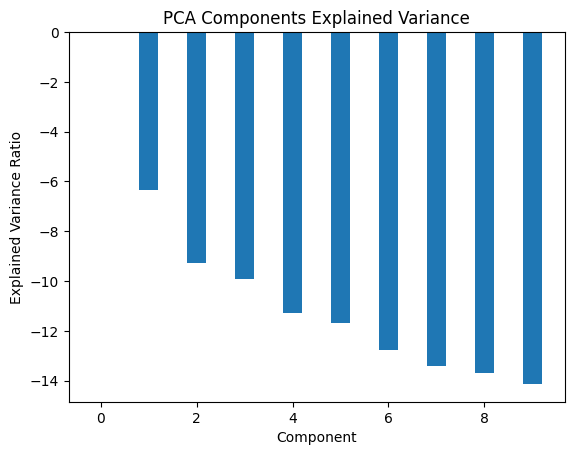

In [58]:
# Answer 2
log_explained_var = [np.log(x) for x in pca.explained_variance_ratio_]
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Components Explained Variance')
plt.bar(x=range(len(log_explained_var)),label=X.columns, height=log_explained_var, width=0.4)

*Comments on graph* <br>
The explained variance ratio represents the portion of variance in the original data that is explained by each component. A higher value for the explained variance ratio indicates that the corresponding PCA component captures a greater amount of variability in the data.

In [61]:
# Answer 3
from scipy.stats import zscore
import numpy as np

# create a new array X_z that is the zscored version of X
X_z = zscore(X)

# calculate the mean and standard deviation of each column
col_means = np.mean(X_z, axis=0)
col_stds = np.std(X_z, axis=0)

# print the mean and standard deviation of each column
for i, col in enumerate(X.columns):
    print(f"{col}: mean={col_means[i]}, std={col_stds[i]}")
#While the means and standard deviations are not exactly 0 or 1 this is due to floating point precision and they are close enough to essentially be equal to 1.0 and 0.0

Alcohol: mean=-8.619821460853744e-16, std=1.0
Malic.acid: mean=-8.357858724706234e-17, std=1.0
Ash: mean=-8.657244708874816e-16, std=1.0
Acl: mean=-1.1601206886532536e-16, std=1.0000000000000004
Mg: mean=-1.995906561123877e-17, std=1.0
Phenols: mean=-2.972029613673523e-16, std=0.9999999999999996
Flavanoids: mean=-4.0167619542618023e-16, std=0.9999999999999998
Nonflavanoid.phenols: mean=4.0791340342969233e-16, std=1.0
Proanth: mean=-1.6996391809570515e-16, std=1.0
Color.int: mean=-1.1226974406321807e-17, std=1.0
Hue: mean=3.717375970093221e-16, std=1.0000000000000002
OD: mean=2.91901334564367e-16, std=1.0
Proline: mean=-7.484649604214538e-18, std=0.9999999999999997


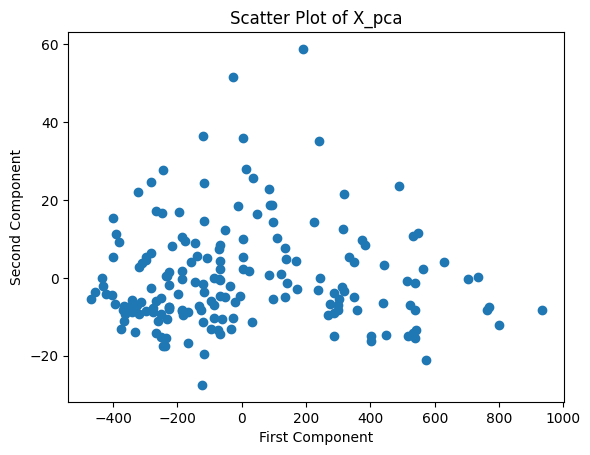

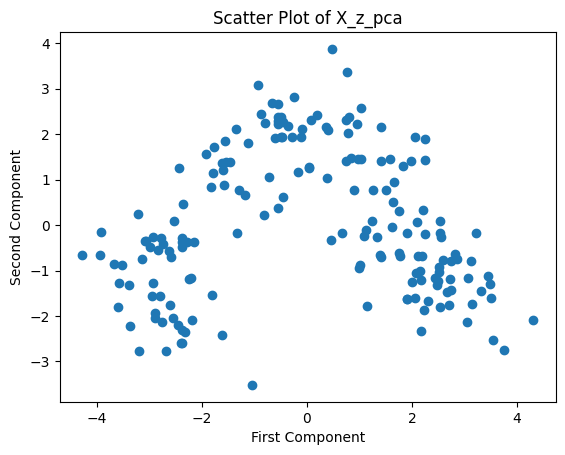

In [62]:
# Answer 4
X_pca = pca.transform(X)

pca_z = PCA()
pca_z.fit(X_z)

X_z_pca = pca_z.transform(X_z)

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.title("Scatter Plot of X_pca")
plt.show()

plt.scatter(X_z_pca[:,0], X_z_pca[:,1])
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.title("Scatter Plot of X_z_pca")
plt.show()

*Comments on graphs* <br>
For X_pca, the data appears to be somewhat random while being roughly horizontal. There does not appear to be any significant relationship between the first and second components. While for X_z_pca, the data appears to mostly follow a quadratic relationship.

>**Ex. 2.3.1**: Take a vector `a = [1, 3, 2, 5, 3, 1, 5, 1, 9000]`:
1. Compute the mean of `a` using `numpy`.
2. How is median defined? Compute the median of `a` using `numpy`.
3. For `a`, why might it make sense to take the median more seriously than the mean?

In [53]:
import numpy as np
a = [1, 3, 2, 5, 3, 1, 5, 1, 9000]
# Answer 1
print("Mean of a: " + str(np.mean(a)))
# Answer 2
# Median is the value that separates the higher half of the dataset from the lower half of the dataset. 
print("Median of a: " + str(np.median(a)))
# For a it might make sense to take the median more seriously than the mean because there is a large outlier of 9000 that skews the data.

Mean of a: 1002.3333333333334
Median of a: 3.0


### Week 3

>**Ex. 3.1.1**: From the Wikipedia API, get a list of all Marvel superheroes and another list of all Marvel supervillains. Use the `get_categorymembers` function below to get the characters in each category: 'Category:Marvel_Comics_supervillains' and 'Category:Marvel_Comics_superheroes'. Make sure you spend some time understanding the code.  How is the query formed?  Why does it take that form?  It will help to look at the [Categorymembers API](https://www.mediawiki.org/wiki/API:Categorymembers).  Moreoever, understand the need for the while loop and role played by the `cmcontinue` variable and query argument.

>After you've obtained the lists for superheroes and supervillains, write some code to answer:
1. How many characters are *ambiguous*, i.e. are both heroes and villains? What is the Jaccard similarity between the two groups?
2. How many superheroes are there? How many supervillains? Do not include ambiguous characters in these counts!
>
>*Hint: Google something like "get list all pages in category wikimedia api" if you're struggling with the query. Also, you may notice that not only Marvel character pages are returned, but also names of subcategories. For now just ignore this and treat them as if they are also characters.*

In [14]:
# Use this function that gets the categorymembers of a category
def get_categorymembers(category):
    members = []
    cmcontinue = ""
    while True:

        # Download data
        data = rq.get('https://en.wikipedia.org/w/api.php?format=json&action=query&list=categorymembers&cmtitle=%s&cmlimit=max&cmcontinue=%s' % (category, cmcontinue)).json()    
        #print(data)
        
        # Add member titles
        members.extend(
            [m['title'] for m in data['query']['categorymembers']]
        )

        # If there is a 'continue' key in `data` then fetch the next 'cmcontinue' value
        if 'continue' in data:
            cmcontinue = data['continue']['cmcontinue']

        # Otherwise break
        else:
            break
            
    return members

In [16]:
# Answer 3.1.1
import requests as rq
superheroes = set(get_categorymembers("Category:Marvel_Comics_superheroes"))
supervillains = set(get_categorymembers("Category:Marvel_Comics_supervillains"))

#1 How many ambigous characters and Jaccard similarity
both = set(superheroes) & set(supervillains)
print(f"Number of characters that are both heroes and villains: {len(both)}")

jaccard_similarity = len(both) / len(set(superheroes) | set(supervillains))
print(f"Jaccard similarity between heroes and villains: {jaccard_similarity}")

#2 How many heroes and villains
#Remove ambiguous characters
superheroes = [char for char in superheroes if char not in both]
supervillains = [char for char in supervillains if char not in both]

# Count the number of superheroes
num_superheroes = len(superheroes)
print(f"Number of superheroes: {num_superheroes}")

# Count the number of supervillains
num_supervillains = len(supervillains)
print(f"Number of supervillains: {num_supervillains}")

Number of characters that are both heroes and villains: 113
Jaccard similarity between heroes and villains: 0.09456066945606695
Number of superheroes: 443
Number of supervillains: 639


>**Ex. 3.2.1**: Extract the length of the page of each character (to do so you will have to open the corresponding file) and plot the distribution of this variable for each class (heroes/villains/ambiguous). Can you say anything about the popularity of characters in the Marvel universe based on your visualization?
>
>*Hint: The simplest thing is to make a probability mass function, i.e. a normalized histogram. [My figure](https://github.com/lucian979/CarletonBD/blob/main/plots/ex3.2.1.pdf) looks like this. Use `plt.hist` on a list of page lengths, with the argument `density=True`. Other distribution plots are fine too, though.*

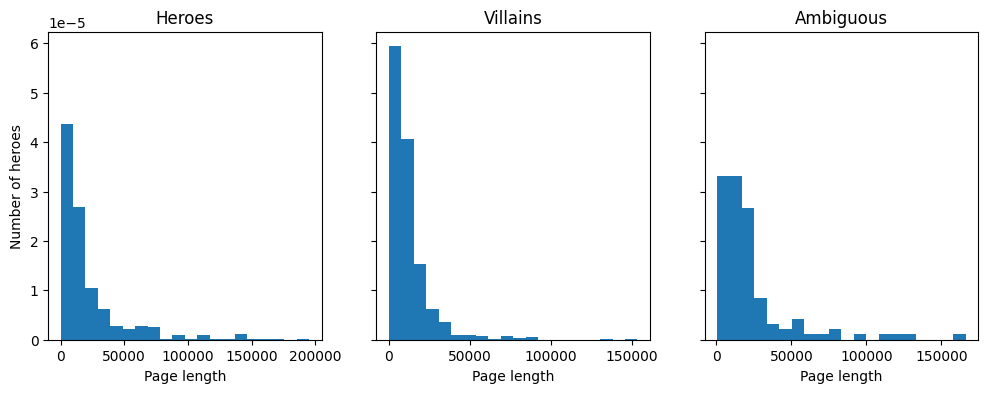

In [64]:
import os
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

hero_lengths = []
villain_lengths = []
ambiguous_lengths = []

for folder in ['heroes', 'villains', 'ambiguous']:
    for file in os.listdir(folder):
        with open(os.path.join(folder, file), 'r', encoding='utf-8') as f:
            markup = f.read()
            soup = BeautifulSoup(markup, 'html.parser')
            text = soup.get_text()
            if folder == 'heroes':
                hero_lengths.append(len(text))
            elif folder == 'villains':
                villain_lengths.append(len(text))
            elif folder == 'ambiguous':
                ambiguous_lengths.append(len(text))

# Plot histograms of the page lengths for each character type
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
axs[0].hist(hero_lengths, bins=20, density = True)
axs[0].set_xlabel("Page length")
axs[0].set_ylabel("Number of heroes")
axs[0].set_title("Heroes")
axs[1].hist(villain_lengths, bins=20, density = True)
axs[1].set_xlabel("Page length")
axs[1].set_title("Villains")
axs[2].hist(ambiguous_lengths, bins=20, density = True)
axs[2].set_xlabel("Page length")
axs[2].set_title("Ambiguous")
plt.show()

*Comments on graphs* <br>
Based on the data it seems like the most popular characters are heroes with a number of heroes having over 150,0000 characters in their markdown files with at least 1 having nearly 200,000 characters while the villains and ambiguous categories have fewer characters with as long of markdown files.

>**Ex. 3.2.3**: In this exercise you want to find out the biggest alliances in the Marvel universe and their members. The data that will help you in doing this is in the *alliances*-field of the markup of each character -- open up a couple of character files and look for that field; get a sense for how the information is stored so that you can then write code to retreave it. Below I suggest steps you can take to solve the problem if you get stuck.
* Use the regular expression `alliances[\w\W]+?\n` to extract the *alliances*-field of a character's markup.
* Use the regular expression `\[\[.+?[\]\|]` to extract links (i.e. each team) from the *alliance*-field.
* You want to store alliance names and the corresponding members (hint: use a `defaultdict`).
* Inspect your team names. Are there any that result from inconsistencies in the information on the pages? How do you deal with this?
* **Print the 10 largest alliances and their number of members.**

In [36]:
import re
from collections import defaultdict
from pathlib import Path

# Set up the regex patterns for extracting alliances and team names
alliances_pattern = re.compile(r"alliances[\w\W]+?\n")
team_pattern = re.compile(r"\[\[.+?[\]\|]")

# Use a defaultdict to store team names and members
teams = defaultdict(list)

# Loop over each character and their markup file
for folder in ['heroes', 'villains', 'ambiguous']:
    for file in os.listdir(folder):
        with open(os.path.join(folder, file), 'r', encoding='utf-8') as f:
            markup = f.read()
            
        # Find the alliances_field using regex
        alliances_field = re.search(alliances_pattern, markup)

        if alliances_field is not None:
            alliances_field = alliances_field.group()

            # Find the team names using regex and add the character to each team
            for team_name in re.findall(team_pattern, alliances_field):
                # Remove the brackets and any text after a pipe character
                team_name = team_name[2:-1].split("|")[0]

                # Add the character to the team in the dictionary
                teams[team_name].append(os.path.splitext(file)[0])

# Print the 10 largest alliances and their number of members
for team_name, team_members in sorted(teams.items(), key=lambda x: len(x[1]), reverse=True)[:10]:
    print(f"{team_name}: {len(team_members)}")



Avengers (comics): 37
Defenders (comics): 23
S.H.I.E.L.D.: 21
New Warriors: 21
Heroes for Hire: 18
X-Men: 16
Invaders (comics): 15
Thunderbolts (comics): 15
Guardians of the Galaxy (2008 team): 12
Avengers Academy: 12


There are inconsistenties in the ways that teams are named with some of the teams that are "sub-teams" of a larger organization such as 'Brotherhood of Mutants#Ultimate Brotherhood', "Guardians of the Galaxy (2008 team)" or team names that have (comics) after their name where the name after the #,  the year in parenthesis, or (comics) indicates the "team version". These can be dealt with in a number of different ways. I chose to leave them because I consider each version to be a separate team, however other analysis could strip the "team version" using regex either removing the year, any text after the #, or "(comics)" which would then cause all the "team versions" to be added together under the main team.